In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
%matplotlib inline

2021-10-07 23:58:51.385980: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-07 23:58:51.386043: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Understanding Data

In [2]:
source_file = pd.read_csv("../data/train.csv")
source_file.head()

nomor  jenis kelamin  usia
0      1              0    27
1      2              1    24
2      3              0    29
3      4              1    23
4      5              0    20

In [3]:
training_path = "../data/raw/Training/{}"
observation_folder_path = training_path.format(source_file.loc[68]["nomor"])
filenames = os.listdir(observation_folder_path)
filenames

['69_1.jpg', '69_2.jpg', '69_3.jpg']

we know that in every folder has more than one file (img) now we'll check what image look alike
so we can decide what should we do next

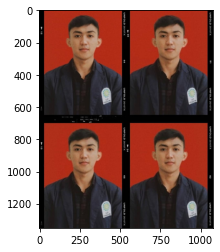

In [4]:
observation_image_path = observation_folder_path+"/"+filenames[2]
observation_image = load_img(observation_image_path)
plt.imshow(observation_image)

From image above that we see there are a lot of noise that could mess up our model, so we need to clean image first
so our model will be focus with person face we will use openCV to do that

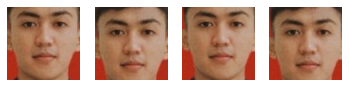

In [5]:
# First we need to detect face from image

from helper.face_detection import detect_faces

# Load image
image = io.imread(observation_image_path)

# Detect faces
detected_faces = detect_faces(image)

# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

In [6]:
from helper.image_clustering import image_clustering
main_face = image_clustering(detected_faces)

for n, img_face in enumerate(main_face):
    plt.subplot(1, len(main_face), n+1)
    plt.axis('off')
    plt.imshow(img_face)

RuntimeError: Unsupported image type, must be 8bit gray or RGB image.